In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm

azdf = pd.read_csv("az.csv")
print(azdf.head())

   id  timepoint  drug   alc  smok
0   1          1   238  1206   333
1   2          1   375  1004   271
2   3          1   403  1190   251
3   4          1   413   593   302
4   5          1   400  1219   380


In [2]:
print(azdf.describe())


                id   timepoint         drug          alc         smok
count  7428.000000  7428.00000  7428.000000  7428.000000  7428.000000
mean    619.500000     3.50000   192.472402   581.801696   229.172725
std     357.403759     1.70794   110.974962   300.642437    65.904549
min       1.000000     1.00000    15.000000    78.000000    21.000000
25%     310.000000     2.00000   121.000000   331.000000   181.000000
50%     619.500000     3.50000   178.500000   531.000000   221.000000
75%     929.000000     5.00000   264.000000   767.000000   269.000000
max    1238.000000     6.00000   558.000000  1618.000000   503.000000


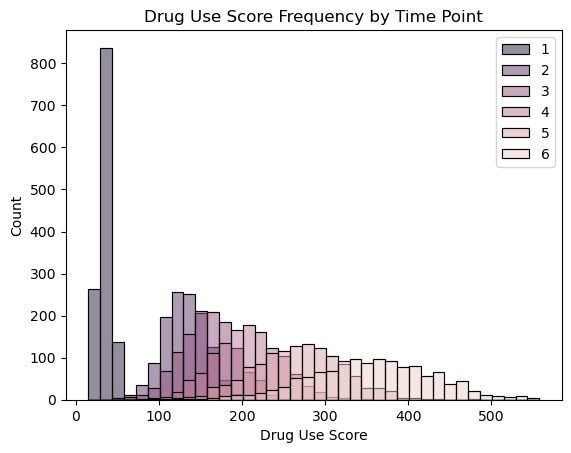

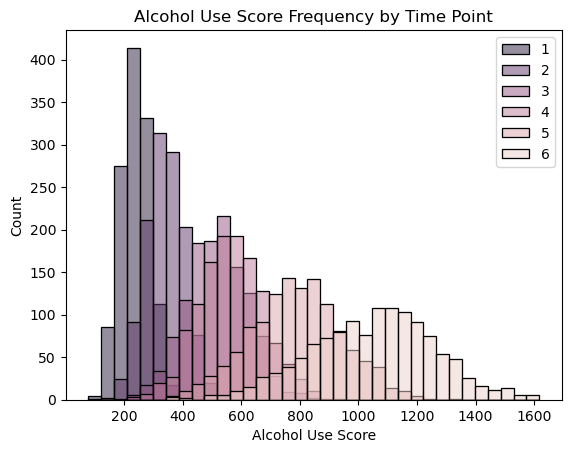

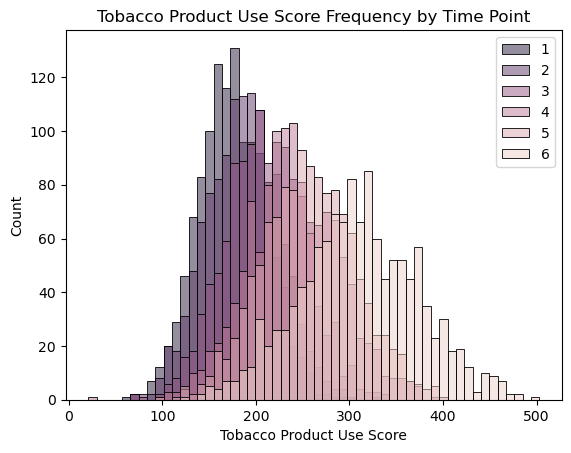

In [3]:
# Alcohol Use
sns.histplot(azdf, x = "drug", hue = "timepoint")
plt.title("Drug Use Score Frequency by Time Point")
plt.legend([1, 2, 3, 4, 5, 6])
plt.xlabel("Drug Use Score")
plt.show()

# Illicit Drug Use
sns.histplot(azdf, x = "alc", hue = "timepoint")
plt.title("Alcohol Use Score Frequency by Time Point")
plt.legend([1, 2, 3, 4, 5, 6])
plt.xlabel("Alcohol Use Score")
plt.show()

#Tobacco Product Use
sns.histplot(azdf, x = "smok", hue = "timepoint")
plt.title("Tobacco Product Use Score Frequency by Time Point")
plt.legend([1, 2, 3, 4, 5, 6])
plt.xlabel("Tobacco Product Use Score")
plt.show()


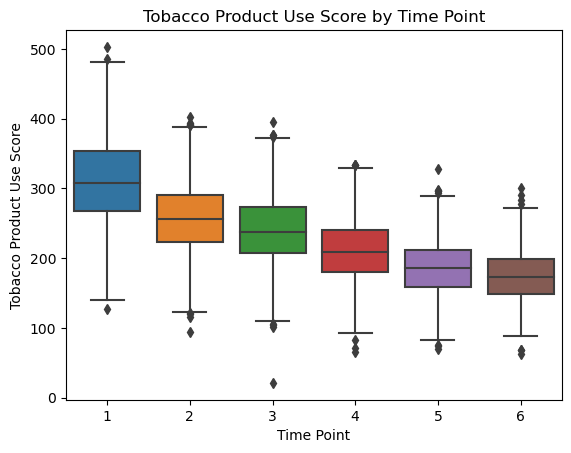

In [4]:
sns.boxplot(data = azdf, x = 'timepoint', y = 'smok')
plt.title("Tobacco Product Use Score by Time Point")
plt.ylabel("Tobacco Product Use Score")
plt.xlabel("Time Point")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

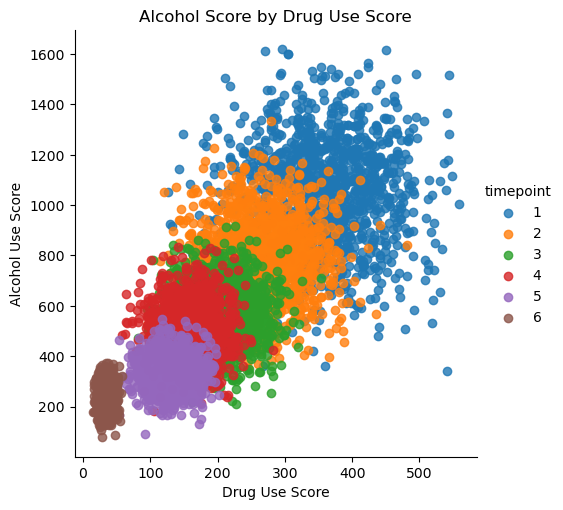

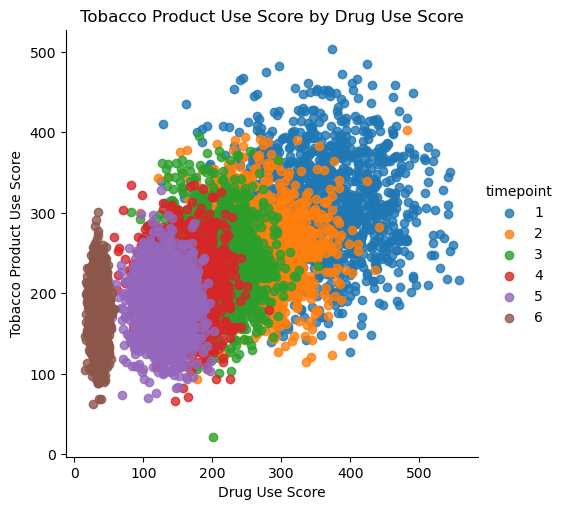

In [5]:
sns.lmplot(x = 'drug', y = 'alc', hue = 'timepoint', data = azdf, fit_reg=False)
plt.title("Alcohol Score by Drug Use Score")
plt.ylabel("Alcohol Use Score")
plt.xlabel("Drug Use Score")
plt.show

sns.lmplot(x = 'drug', y = 'smok', hue = 'timepoint', data = azdf, fit_reg=False)
plt.title("Tobacco Product Use Score by Drug Use Score")
plt.ylabel("Tobacco Product Use Score")
plt.xlabel("Drug Use Score")
plt.show

H1: Alcohol use and drug use scores will be correlated
---
Model Results:
Intercept    17.627820
alc           0.300523
dtype: float64


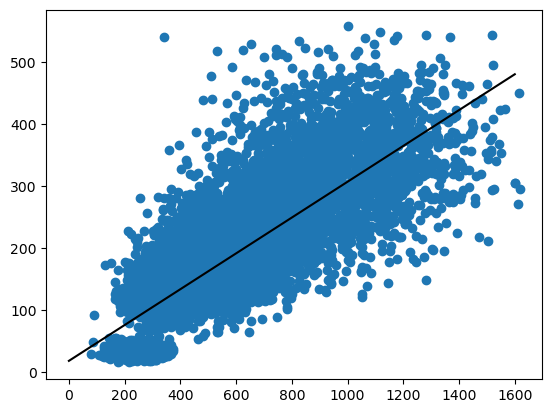

Pearson's R Result : r = 0.814, p < 0.001; Null Hypothesis Rejected


In [6]:
print('H1: Alcohol use and drug use scores will be correlated')
#pearson's correlation
plt.scatter(azdf.alc, azdf.drug)
model = sm.OLS.from_formula('drug ~ alc', data = azdf)
results = model.fit()
print('---')
print('Model Results:')
print(results.params)
y = [17.628,480.8]
x = [0,1600]
plt.plot(x,y, color='black')
plt.show()
#checked assumptions
pearsonr(azdf.alc, azdf.drug)
print('Pearson\'s R Result : r = 0.814, p < 0.001; Null Hypothesis Rejected')

H2: Alcohol use will decrease over time.


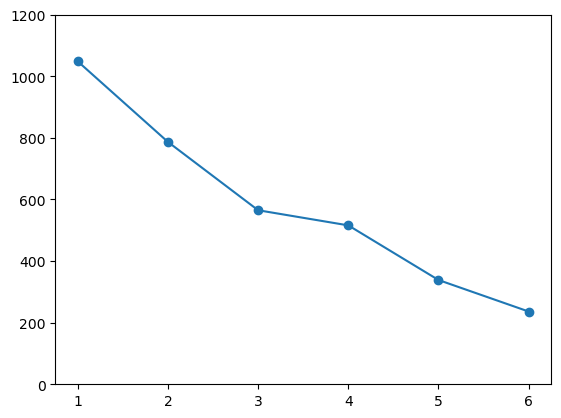

Result of ANOVA: f = 6619.48, p < 0.001; Null hypothesis rejected


In [7]:
print('H2: Alcohol use will decrease over time.')
y = [azdf[azdf.timepoint == 1].alc.mean(), 
    azdf[azdf.timepoint == 2].alc.mean(),
    azdf[azdf.timepoint == 3].alc.mean(),
    azdf[azdf.timepoint == 4].alc.mean(),
    azdf[azdf.timepoint == 5].alc.mean(),
    azdf[azdf.timepoint == 6].alc.mean()]
x = [1,2,3,4,5,6]
plt.plot(x,y, marker='o')
plt.yticks([0, 200, 400, 600, 800, 1000, 1200 ])
plt.show()
#checked assumptions
fvalue, pvalue = stats.f_oneway(azdf[azdf.timepoint ==1].alc, 
                                azdf[azdf.timepoint ==2].alc, 
                                azdf[azdf.timepoint ==3].alc, 
                                azdf[azdf.timepoint ==4].alc, 
                                azdf[azdf.timepoint ==5].alc, 
                                azdf[azdf.timepoint ==6].alc)
print('Result of ANOVA: f = 6619.48, p < 0.001; Null hypothesis rejected')

H3: Drug use will decrease over time.


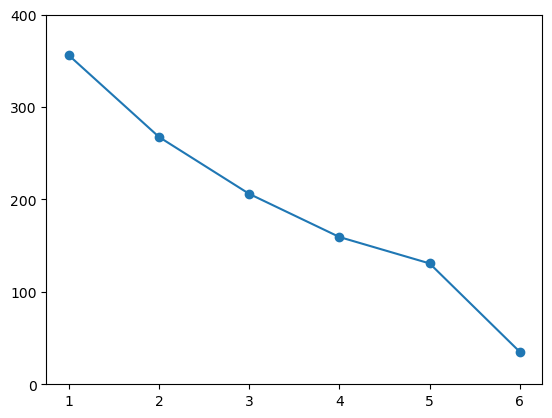

Result of ANOVA : f = 7925.72, p < 0.001; Null hypothesis rejected


In [8]:
print('H3: Drug use will decrease over time.')
y = [azdf[azdf.timepoint == 1].drug.mean(), 
    azdf[azdf.timepoint == 2].drug.mean(),
    azdf[azdf.timepoint == 3].drug.mean(),
    azdf[azdf.timepoint == 4].drug.mean(),
    azdf[azdf.timepoint == 5].drug.mean(),
    azdf[azdf.timepoint == 6].drug.mean()]
x = [1,2,3,4,5,6]
plt.plot(x,y, marker='o')
plt.yticks([0, 100, 200, 300, 400])
plt.show()
#checked assumptions
fvalue, pvalue = stats.f_oneway(azdf[azdf.timepoint ==1].drug, 
                                azdf[azdf.timepoint ==2].drug, 
                                azdf[azdf.timepoint ==3].drug, 
                                azdf[azdf.timepoint ==4].drug, 
                                azdf[azdf.timepoint ==5].drug, 
                                azdf[azdf.timepoint ==6].drug)
#print(fvalue, pvalue)
print('Result of ANOVA : f = 7925.72, p < 0.001; Null hypothesis rejected')

H4: Tobacco product use will decrease over time.


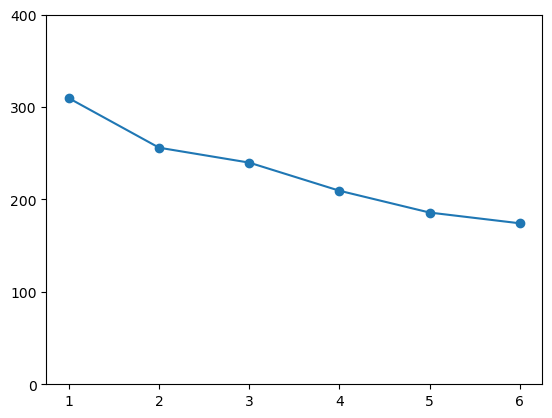

Result of ANOVA : f = 1387.42, p < 0.001; Null hypothesis rejected


In [9]:
print('H4: Tobacco product use will decrease over time.')
y = [azdf[azdf.timepoint == 1].smok.mean(), 
    azdf[azdf.timepoint == 2].smok.mean(),
    azdf[azdf.timepoint == 3].smok.mean(),
    azdf[azdf.timepoint == 4].smok.mean(),
    azdf[azdf.timepoint == 5].smok.mean(),
    azdf[azdf.timepoint == 6].smok.mean()]
x = [1,2,3,4,5,6]
plt.plot(x,y, marker='o')
plt.yticks([0, 100, 200, 300, 400])
plt.show()
#checked assumptions
fvalue, pvalue = stats.f_oneway(azdf[azdf.timepoint ==1].smok, 
                                azdf[azdf.timepoint ==2].smok, 
                                azdf[azdf.timepoint ==3].smok, 
                                azdf[azdf.timepoint ==4].smok, 
                                azdf[azdf.timepoint ==5].smok, 
                                azdf[azdf.timepoint ==6].smok)
#print(fvalue, pvalue)
print('Result of ANOVA : f = 1387.42, p < 0.001; Null hypothesis rejected')